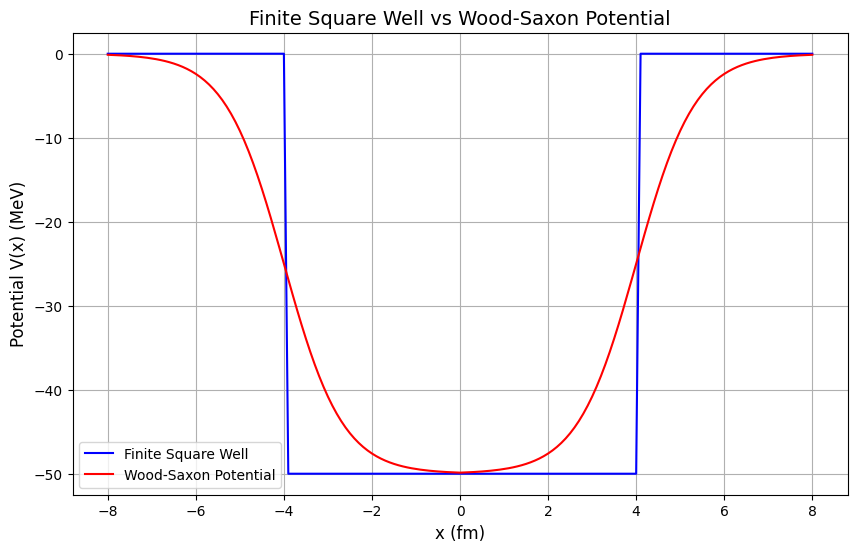

Finite Square Well Eigenvalues (MeV):
n=1: E=-48.71 MeV
n=2: E=-44.86 MeV
n=3: E=-38.50 MeV
n=4: E=-29.73 MeV

Wood-Saxon Potential Eigenvalues (MeV):
n=1: E=-47.20 MeV
n=2: E=-40.90 MeV
n=3: E=-32.94 MeV
n=4: E=-24.07 MeV


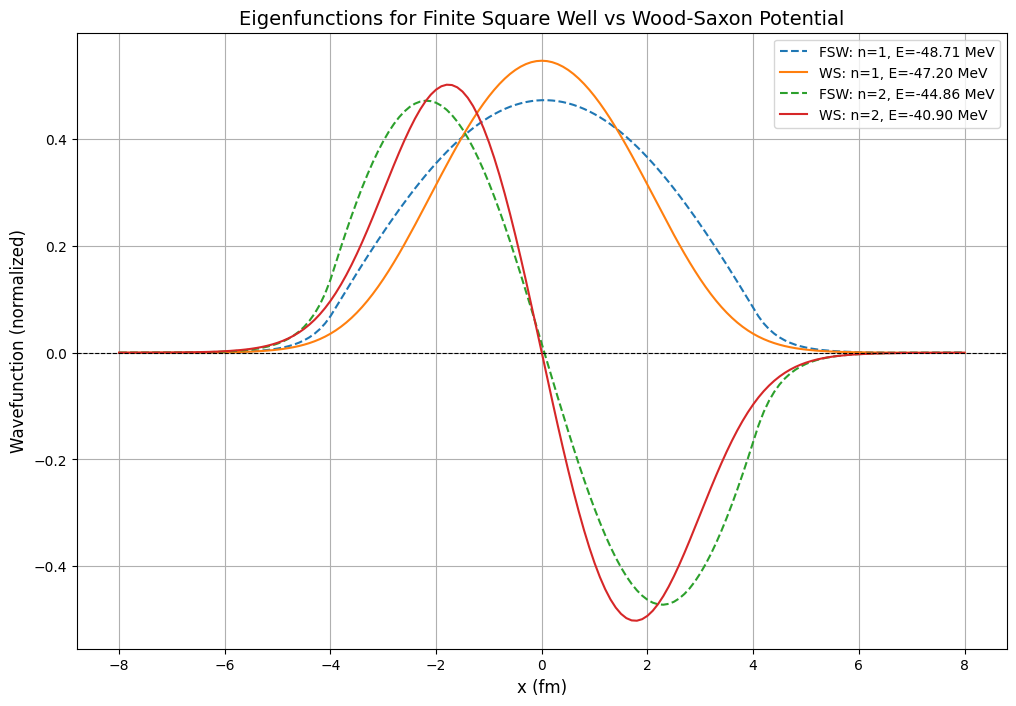

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
hbar2_over_2m = 20.75  # MeV·fm²
V0 = 50.0  # MeV (depth of the potential)
R = 4.0  # fm (width or radius of the potential)
a0 = 0.67  # fm (diffuseness for Wood-Saxon potential)
h = 0.1  # fm (mesh size)
tolerance = 1e-6  # Energy convergence criterion

# Finite square well potential
def V_fsw(x):
    return -V0 if abs(x) <= R else 0.0

# Wood-Saxon potential
def V_ws(x):
    return -V0 / (1 + np.exp((abs(x) - R) / a0))

# Numerov function
def numerov(E, x_grid, V_func):
    """Numerov method for propagating the wavefunction."""
    N = len(x_grid)
    psi = np.zeros(N)  # Wavefunction array
    k = 2 * (E - np.array([V_func(x) for x in x_grid])) / hbar2_over_2m  # k(x) = 2(E - V)/hbar²

    # Initial conditions (ψ(0) = 0, small arbitrary ψ(h))
    psi[0] = 0.0
    psi[1] = 1e-5  # Small arbitrary value

    # Numerov propagation
    for i in range(1, N - 1):
        psi[i + 1] = (
            (2 * (1 - (5 / 12) * h**2 * k[i]) * psi[i]
             - (1 + (1 / 12) * h**2 * k[i - 1]) * psi[i - 1])
            / (1 + (1 / 12) * h**2 * k[i + 1])
        )

    return psi

# Shooting method to find eigenvalues
def shooting_method(n_nodes, x_grid, V_func):
    """Find the eigenvalue for a given number of nodes using the shooting method."""
    E_low, E_high = -V0, 100.0  # Energy range to search
    psi = None

    while E_high - E_low > tolerance:
        E_mid = (E_low + E_high) / 2
        psi = numerov(E_mid, x_grid, V_func)

        # Count the number of nodes
        nodes = np.sum(psi[:-1] * psi[1:] < 0)

        # Adjust the energy bounds
        if nodes > n_nodes:
            E_high = E_mid
        else:
            E_low = E_mid

    return E_mid, psi

# Set up the spatial grid
x_grid = np.arange(-2 * R, 2 * R + h, h)

# Solve for the first four eigenvalues and eigenfunctions for both potentials
n_levels = 4
fsw_eigenvalues, ws_eigenvalues = [], []
fsw_wavefunctions, ws_wavefunctions = [], []

for n_nodes in range(n_levels):
    # Finite Square Well
    E_fsw, psi_fsw = shooting_method(n_nodes, x_grid, V_fsw)
    fsw_eigenvalues.append(E_fsw)
    fsw_wavefunctions.append(psi_fsw / np.sqrt(np.sum(psi_fsw**2) * h))  # Normalize

    # Wood-Saxon Potential
    E_ws, psi_ws = shooting_method(n_nodes, x_grid, V_ws)
    ws_eigenvalues.append(E_ws)
    ws_wavefunctions.append(psi_ws / np.sqrt(np.sum(psi_ws**2) * h))  # Normalize

# Plot the potentials
V_fsw_array = np.array([V_fsw(x) for x in x_grid])
V_ws_array = np.array([V_ws(x) for x in x_grid])

plt.figure(figsize=(10, 6))
plt.plot(x_grid, V_fsw_array, label="Finite Square Well", color="blue")
plt.plot(x_grid, V_ws_array, label="Wood-Saxon Potential", color="red")
plt.title("Finite Square Well vs Wood-Saxon Potential", fontsize=14)
plt.xlabel("x (fm)", fontsize=12)
plt.ylabel("Potential V(x) (MeV)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Print the eigenvalues for comparison
print("Finite Square Well Eigenvalues (MeV):")
for n, energy in enumerate(fsw_eigenvalues, start=1):
    print(f"n={n}: E={energy:.2f} MeV")

print("\nWood-Saxon Potential Eigenvalues (MeV):")
for n, energy in enumerate(ws_eigenvalues, start=1):
    print(f"n={n}: E={energy:.2f} MeV")

# Plot eigenfunctions for the first two levels for each potential
plt.figure(figsize=(12, 8))
for i in range(2):
    # Finite Square Well
    plt.plot(
        x_grid,
        fsw_wavefunctions[i],
        label=f"FSW: n={i+1}, E={fsw_eigenvalues[i]:.2f} MeV",
        linestyle="--",
    )
    # Wood-Saxon
    plt.plot(
        x_grid,
        ws_wavefunctions[i],
        label=f"WS: n={i+1}, E={ws_eigenvalues[i]:.2f} MeV",
    )

plt.title("Eigenfunctions for Finite Square Well vs Wood-Saxon Potential", fontsize=14)
plt.xlabel("x (fm)", fontsize=12)
plt.ylabel("Wavefunction (normalized)", fontsize=12)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()
